# <center><ins>COVID19 ANALYTICS</ins></center>

Una entidad gubernamental responsable de la gestión de la salud en un país enfrenta el desafío de comprender y analizar la propagación del COVID-19 para tomar decisiones informadas y eficaces en la gestión de la pandemia. Como científico de datos, tu tarea es analizar los datos relacionados con el COVID-19 y presentar insights a través de visualizaciones que respondan a las siguientes preguntas clave:

**Preguntas:**

1. ¿Cómo ha evolucionado el Covid-19 en **México-Perú-Colombia** en comparación con el impacto observado a nivel global?

2. ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en **Colombia** a lo largo del tiempo?

3. ¿Cuál es la evolución del índice de letalidad del Covid-19 en **Colombia**, comparado con los países con los índices históricos más elevados?


## 1. Importando Nuestros Datasets


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from io import StringIO
import requests

In [ ]:
## Guardando en variables nuestros datasets
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))
df_population = pd.read_excel('https://raw.githubusercontent.com/davidcarrillo10288/Covid-19-analysis/master/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)
df_population = df_population[df_population['Year'] == 2019]

In [ ]:
## Validando nuestro dataset Covid19
df_covid.head(8)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0
5,2020-02-09,AF,Afghanistan,EMRO,NaN,0,NaN,0
6,2020-02-16,AF,Afghanistan,EMRO,NaN,0,NaN,0
7,2020-02-23,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [ ]:
df_population.head()

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
69,70,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,209.694,146.21,71.916,87.268,55.799,138.207,168.929,106.291,0,0
142,143,Estimates,Sub-Saharan Africa,b,1834,NaN,NaN,202.0,SDG region,1828,...,388.622,324.278,173.83,192.276,155.259,284.876,316.977,253.162,-484.702,-0.448
214,215,Estimates,Northern Africa and Western Asia,NaN,1833,NaN,NaN,747.0,SDG region,1828,...,174.739,113.261,53.27,65.448,39.486,118.468,146.064,87.691,-124.728,-0.235
286,287,Estimates,Central and Southern Asia,NaN,1831,NaN,NaN,62.0,SDG region,1828,...,227.047,168.558,75.217,90.827,58.668,161.773,190.486,131.231,-2473.484,-1.223
358,359,Estimates,Eastern and South-Eastern Asia,NaN,1832,NaN,NaN,753.0,SDG region,1828,...,145.643,86.283,47.004,58.936,34.318,100.287,128.133,71.208,-99.778,-0.043


## 2. Análisis Exploratorio de Datos (EDA)

---






### 2.1 EDA Base Covid World Health Organization

---



In [ ]:
## Realizamos una exploracion de nuestros datos
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55680 entries, 0 to 55679
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      55680 non-null  object 
 1   Country_code       55448 non-null  object 
 2   Country            55680 non-null  object 
 3   WHO_region         51504 non-null  object 
 4   New_cases          38318 non-null  float64
 5   Cumulative_cases   55680 non-null  int64  
 6   New_deaths         24796 non-null  float64
 7   Cumulative_deaths  55680 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.4+ MB


* Observamos que tenemos 8 columnas y 55680 registros.
* Notamos la presencia de valores nulos, esto se analizará posteriormente.
* Los tipos de datos son 3, (Objeto, entero, flotante).

### 2.1.1 Tratamiento de Valores nulos

---



In [ ]:
## Importamos la Librería Missingno, para poder visualizar nuestros valores nulos presentes
import missingno as msno

In [ ]:
## Verificando la presencia de valores nulos en el dataset
df_covid.isnull().sum().sort_values(ascending=False)

New_deaths           30884
New_cases            17362
WHO_region            4176
Country_code           232
Date_reported            0
Country                  0
Cumulative_cases         0
Cumulative_deaths        0
dtype: int64

* Observamos que existe presencia de datos nulos.
* Tenemos que validar la relación que existen entre datos nulos.
* La presencia de datos nulos en variables como 'country_code' y 'country', nos generan alerta, ya que de no tener datos para estas columnas, esto no generaría valor para el dataset.
* Se evaluará la posibilidad de eliminar ciertas filas que tengan presencia de valores nulos.

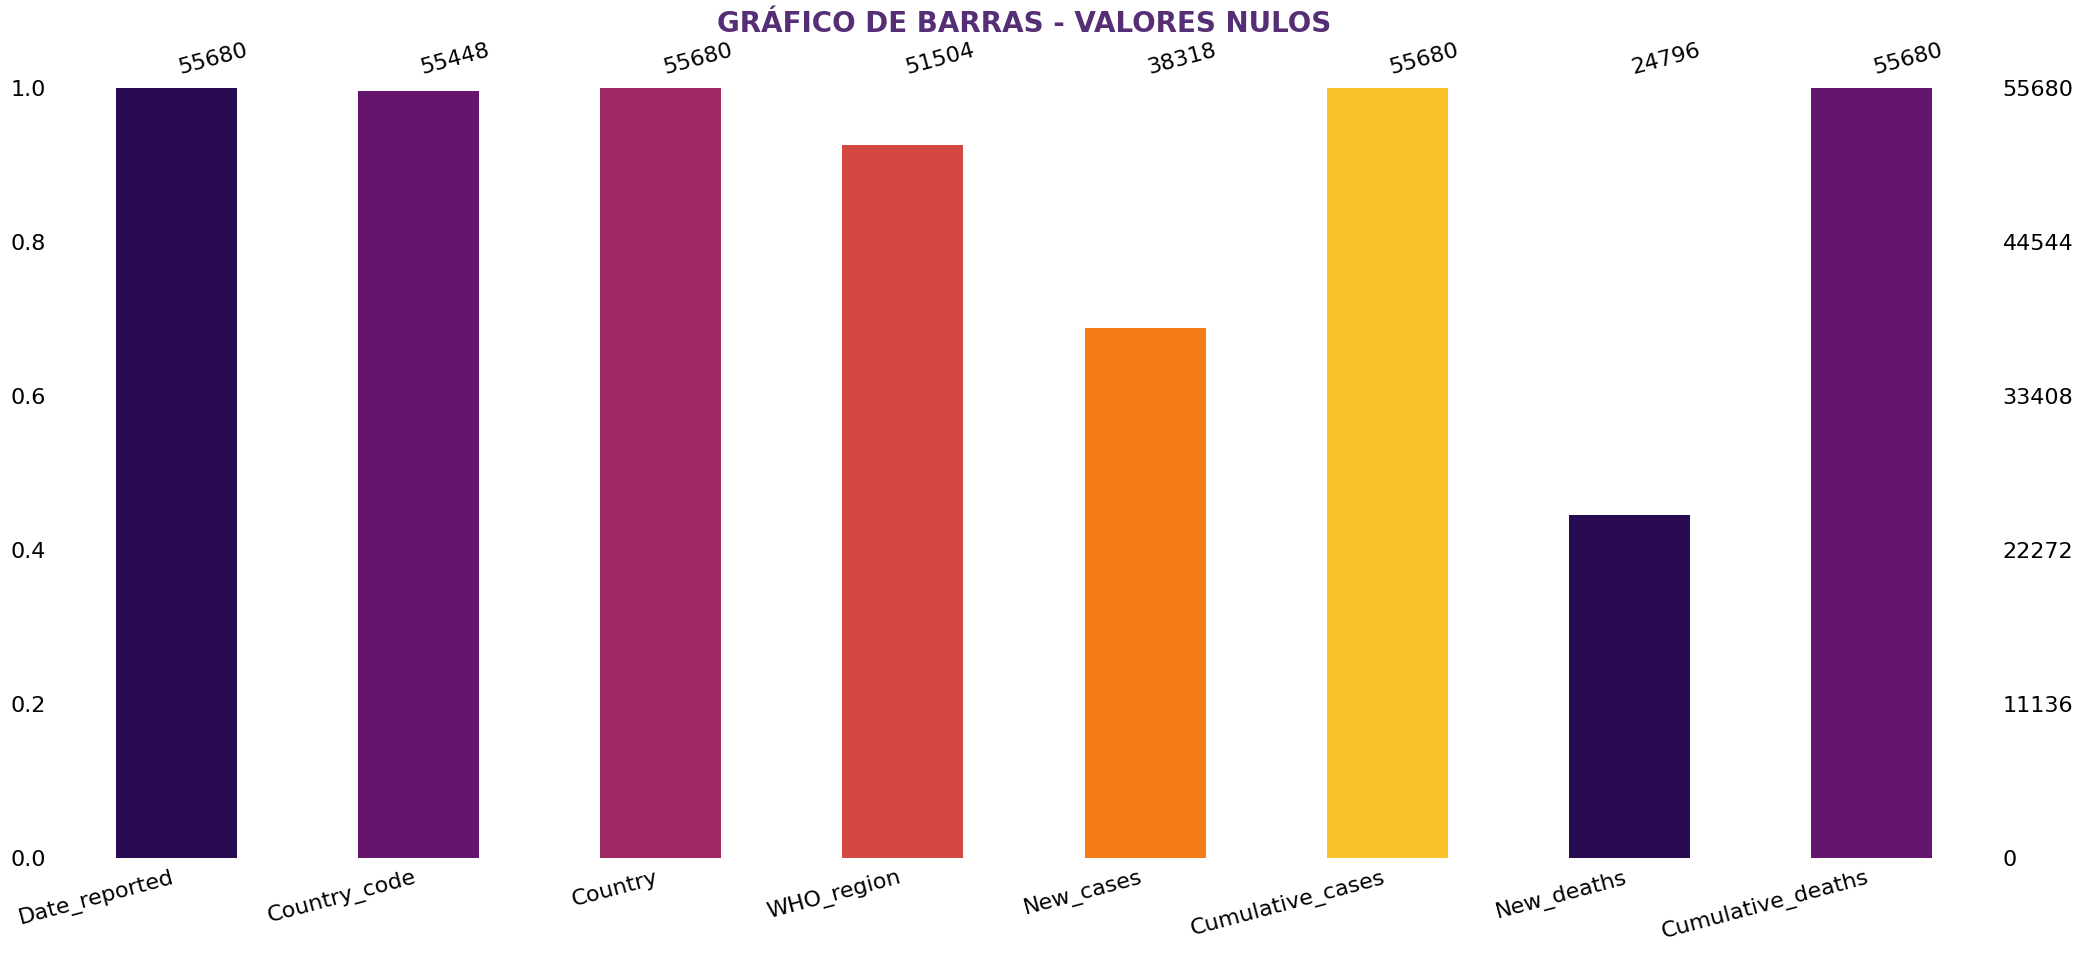

In [ ]:
## Mostrando visualmente la cantidad de nulos para cada variable, con respecto al total de datos
msno.bar(df_covid, color=sns.color_palette("inferno"),label_rotation=15)
plt.title('GRÁFICO DE BARRAS - VALORES NULOS', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '#552E75'})
# plt.tight_layout()
plt.show()

> * **Si bien es cierto, hay algunas variables que tienen fuerte cantidad de nulos, considerar que puede ser simplemente que se tenga que modificar por valores de cero.**
> * **Las variables 'country_code' y 'country', tienen presencia de nulos, pero en cantidades pequeñas.**

**OBS: ELIMINADO LOS VALORES NULOS DE COUNTRY_CODE**

---



In [ ]:
index_country_code_nulos = df_covid[df_covid['Country_code'].isnull()].index
print(index_country_code_nulos)

Index([34568, 34569, 34570, 34571, 34572, 34573, 34574, 34575, 34576, 34577,
       ...
       34790, 34791, 34792, 34793, 34794, 34795, 34796, 34797, 34798, 34799],
      dtype='int64', length=232)


In [ ]:
df_covid_limpio = df_covid.drop(index_country_code_nulos)
df_covid_limpio

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
55675,2024-05-12,ZW,Zimbabwe,AFRO,NaN,266365,NaN,5740
55676,2024-05-19,ZW,Zimbabwe,AFRO,NaN,266365,NaN,5740
55677,2024-05-26,ZW,Zimbabwe,AFRO,NaN,266365,NaN,5740
55678,2024-06-02,ZW,Zimbabwe,AFRO,NaN,266365,NaN,5740


In [ ]:
df_covid_limpio.shape, df_covid.shape

((55448, 8), (55680, 8))

* Validamos que se eliminaron los valores nulos de forma correcta

### 2.1.2 Tratamiento de Duplicados

In [ ]:
## Verificando presencia de duplicados en el dataframe original
df_covid.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
55675    False
55676    False
55677    False
55678    False
55679    False
Length: 55680, dtype: bool

In [ ]:
## Cantidad de datos duplicados en todo el dataframe original
df_covid.duplicated().sum()

0

**Observamos que nuestro DF original no presenta duplicados**

### 2.1.3 Convirtiendo los Valores Nulos existentes en Valor numérico 'Cero'

---



In [ ]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55448 entries, 0 to 55679
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      55448 non-null  object 
 1   Country_code       55448 non-null  object 
 2   Country            55448 non-null  object 
 3   WHO_region         51272 non-null  object 
 4   New_cases          38127 non-null  float64
 5   Cumulative_cases   55448 non-null  int64  
 6   New_deaths         24671 non-null  float64
 7   Cumulative_deaths  55448 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.8+ MB


* Notamos que las variables que son del tipo Object, ya no tienen datos nulos a excepción de la variable 'WHO_region'
* Al analizar esta variable 'WHO_region', observamos que es solo una etiqueta que representa la región al que pertenece cada país. En este caso, consideramos no relevante para nuestros análisis posteriores. Se decide prescindir de esta variable.
* Las otras variables restantes, notamos que son datos numéricos, enteros y flotantes.
* Al visualizar el dataframe notamos que estas variables numéricas, representan datos de casos y/o decesos, por consiguientes estos datos nulos en sí son valores CERO.
* Se decide realizar el cambio de valores nulos por el valor CERO. Se realiza el proceso .replace(np.nan,0)

In [ ]:
## Eliminamos la columna 'WHO_region'
df_covid_limpio = df_covid_limpio.drop(columns= 'WHO_region')
df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,NaN,0,NaN,0


In [ ]:
## Reemplazamos los valores nulos restantes por el valor CERO
df_covid_limpio = df_covid_limpio.replace(np.nan,0)
df_covid_limpio.head(10)

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,0.0,0,0.0,0
1,2020-01-12,AF,Afghanistan,0.0,0,0.0,0
2,2020-01-19,AF,Afghanistan,0.0,0,0.0,0
3,2020-01-26,AF,Afghanistan,0.0,0,0.0,0
4,2020-02-02,AF,Afghanistan,0.0,0,0.0,0
5,2020-02-09,AF,Afghanistan,0.0,0,0.0,0
6,2020-02-16,AF,Afghanistan,0.0,0,0.0,0
7,2020-02-23,AF,Afghanistan,0.0,0,0.0,0
8,2020-03-01,AF,Afghanistan,1.0,1,0.0,0
9,2020-03-08,AF,Afghanistan,0.0,1,0.0,0


In [ ]:
## Validamos si seguimos teniendo presencia de valores nulos
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55448 entries, 0 to 55679
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      55448 non-null  object 
 1   Country_code       55448 non-null  object 
 2   Country            55448 non-null  object 
 3   New_cases          55448 non-null  float64
 4   Cumulative_cases   55448 non-null  int64  
 5   New_deaths         55448 non-null  float64
 6   Cumulative_deaths  55448 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.4+ MB


In [ ]:
df_covid_limpio.isnull().sum()

Date_reported        0
Country_code         0
Country              0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

> * **No tenemos presencia de datos nulos en nuestro dataframe Limpio**

### 2.1.4 Convirtiendo la columna 'Date_reported' a un formato datetime

---



In [ ]:
## Se utiliza el método de pandas to_datetime
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'])
df_covid_limpio['Date_str'] = df_covid_limpio['Date_reported'].dt.strftime('%Y-%m-%d')
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55448 entries, 0 to 55679
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      55448 non-null  datetime64[ns]
 1   Country_code       55448 non-null  object        
 2   Country            55448 non-null  object        
 3   New_cases          55448 non-null  float64       
 4   Cumulative_cases   55448 non-null  int64         
 5   New_deaths         55448 non-null  float64       
 6   Cumulative_deaths  55448 non-null  int64         
 7   Date_str           55448 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 5.8+ MB


### 2.1.4 Convirtiendo la columna ''New_cases', 'New_deaths' a un formato int64

---

In [ ]:
## Transformando los datos a valores enteros
df_covid_limpio['New_cases'] = df_covid_limpio['New_cases'].astype('int64')
df_covid_limpio['New_deaths'] = df_covid_limpio['New_deaths'].astype('int64')

In [ ]:
## Verificando nuevamente los tipos de datos en el dataframe
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55448 entries, 0 to 55679
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      55448 non-null  datetime64[ns]
 1   Country_code       55448 non-null  object        
 2   Country            55448 non-null  object        
 3   New_cases          55448 non-null  int64         
 4   Cumulative_cases   55448 non-null  int64         
 5   New_deaths         55448 non-null  int64         
 6   Cumulative_deaths  55448 non-null  int64         
 7   Date_str           55448 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 5.8+ MB


## 2.1.7 Tratamiento de Valores Atípicos

---


In [ ]:
## Analizamos los valores estadísticos principales de nuestro dataframe
df_covid_limpio.describe()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,55448,5.544800e+04,5.544800e+04,55448.000000,5.544800e+04
mean,2022-03-23 12:00:00.000000256,1.398505e+04,1.743645e+06,127.095928,1.971775e+04
min,2020-01-05 00:00:00,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,2021-02-12 06:00:00,0.000000e+00,3.685750e+03,0.000000,2.500000e+01
50%,2022-03-23 12:00:00,5.600000e+01,4.344650e+04,0.000000,4.795000e+02
75%,2023-05-01 18:00:00,1.412000e+03,5.145240e+05,14.000000,6.881000e+03
max,2024-06-09 00:00:00,4.047548e+07,1.034368e+08,47687.000000,1.188935e+06
std,NaN,2.273584e+05,7.641298e+06,827.433889,8.094084e+04


* Observamos que si bien no hay valores nulos, hay ciertas columnas que nos indican datos confusos
* En las columnas New_cases y New_deaths, visualizamos que tienen valores minimos negativos, lo cual no es posible, se evaluará posteriormente


In [ ]:
## Creando un backup
df_covid_limpio_2 = df_covid_limpio.copy()

In [ ]:
## Verificando lo sucedido con la columna New_deaths, cantidad de valores negativos
(df_covid_limpio['New_deaths']<0).sum()

12

In [ ]:
# Encontrando las filas donde la columna New_deaths tiene valores negativos
filas_con_negativos = list(df_covid_limpio.index[df_covid_limpio['New_deaths'] <0])

# Muestra las filas que contienen 'inf' en la columna lethality_rate
print("Filas con valores negativos en la columna New_deaths:", filas_con_negativos)

Filas con valores negativos en la columna New_deaths: [2737, 5893, 8712, 10145, 10418, 20459, 24110, 38686, 38932, 41330, 45599, 49462]


In [ ]:
## Observando en mi dataframe, estas filas para ver que sucedió porque se generaron valores negativos
df_covid_limpio_2.loc[[2726, 5868, 8675, 10102, 10374, 20371, 24007, 38520, 38765, 41152, 45403, 49249],:]

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date_str
2726,2023-05-07,AU,Australia,29663,11295254,173,21514,2023-05-07
5868,2021-04-25,BQ,"Bonaire, Saint Eustatius and Saba",16,1553,1,15,2021-04-25
8675,2021-10-03,CA,Canada,30335,1629142,298,27642,2021-10-03
10102,2022-06-05,CL,Chile,55211,3739796,78,57955,2022-06-05
10374,2023-03-12,CN,China,92268,99159203,329,120510,2023-03-12
20371,2023-08-06,GD,Grenada,0,19693,0,238,2023-08-06
24007,2022-02-20,ID,Indonesia,389727,5197505,1189,146365,2022-02-20
38520,2020-03-01,PA,Panama,0,0,0,0,2020-03-01
38765,2020-05-31,PG,Papua New Guinea,0,8,0,0,2020-05-31
41152,2021-09-12,MD,Republic of Moldova,4613,274599,81,7076,2021-09-12


In [ ]:
# Reemplazar valores negativos por cero
df_covid_limpio_2['New_deaths'] = df_covid_limpio_2['New_deaths'].apply(lambda x: max(x, 0))

# Aplicar la transformación logarítmica
df_covid_limpio_2['New_deaths_log'] = np.log(df_covid_limpio_2['New_deaths'] + 1)

print(df_covid_limpio_2)

      Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0        2020-01-05           AF  Afghanistan          0                 0   
1        2020-01-12           AF  Afghanistan          0                 0   
2        2020-01-19           AF  Afghanistan          0                 0   
3        2020-01-26           AF  Afghanistan          0                 0   
4        2020-02-02           AF  Afghanistan          0                 0   
...             ...          ...          ...        ...               ...   
55675    2024-05-12           ZW     Zimbabwe          0            266365   
55676    2024-05-19           ZW     Zimbabwe          0            266365   
55677    2024-05-26           ZW     Zimbabwe          0            266365   
55678    2024-06-02           ZW     Zimbabwe          0            266365   
55679    2024-06-09           ZW     Zimbabwe          0            266365   

       New_deaths  Cumulative_deaths    Date_str  New_deaths_lo

* Para evitar obtener valores inf (infinito) al aplicar una transformación logarítmica en un DataFrame que contiene valores negativos y ceros, primero se deben manejar adecuadamente estos valores.

* Una técnica consiste en usar una función lambda para reemplazar los valores negativos con NaN (Not a Number) y luego aplicar el logaritmo natural sumando 1 a los valores positivos.

* Estas estrategias permiten manejar adecuadamente los valores especiales y realizar la transformación logarítmica de manera efectiva, manteniendo la integridad del análisis de datos.

### 2.1.8 Dataframe Transformado


---



In [ ]:
## Reasignando la variable y corrigiendo el índice
df_covid_limpio_final = df_covid_limpio_2.reset_index(drop=True)
df_covid_limpio_final

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date_str,New_deaths_log
0,2020-01-05,AF,Afghanistan,0,0,0,0,2020-01-05,0.0
1,2020-01-12,AF,Afghanistan,0,0,0,0,2020-01-12,0.0
2,2020-01-19,AF,Afghanistan,0,0,0,0,2020-01-19,0.0
3,2020-01-26,AF,Afghanistan,0,0,0,0,2020-01-26,0.0
4,2020-02-02,AF,Afghanistan,0,0,0,0,2020-02-02,0.0
...,...,...,...,...,...,...,...,...,...
55443,2024-05-12,ZW,Zimbabwe,0,266365,0,5740,2024-05-12,0.0
55444,2024-05-19,ZW,Zimbabwe,0,266365,0,5740,2024-05-19,0.0
55445,2024-05-26,ZW,Zimbabwe,0,266365,0,5740,2024-05-26,0.0
55446,2024-06-02,ZW,Zimbabwe,0,266365,0,5740,2024-06-02,0.0


* Conseguimos el dataframe **df_covid_limpio_final**, el cual ya esta trabajado, libre de valores nulos y atípicos. Se continuará trabajando de ahora en adelante con este dataframe.

### 2.2 EDA Base Population United Nations

In [ ]:
## Vista general del dataframe
df_population

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
69,70,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,209.694,146.21,71.916,87.268,55.799,138.207,168.929,106.291,0,0
142,143,Estimates,Sub-Saharan Africa,b,1834,NaN,NaN,202.0,SDG region,1828,...,388.622,324.278,173.83,192.276,155.259,284.876,316.977,253.162,-484.702,-0.448
214,215,Estimates,Northern Africa and Western Asia,NaN,1833,NaN,NaN,747.0,SDG region,1828,...,174.739,113.261,53.27,65.448,39.486,118.468,146.064,87.691,-124.728,-0.235
286,287,Estimates,Central and Southern Asia,NaN,1831,NaN,NaN,62.0,SDG region,1828,...,227.047,168.558,75.217,90.827,58.668,161.773,190.486,131.231,-2473.484,-1.223
358,359,Estimates,Eastern and South-Eastern Asia,NaN,1832,NaN,NaN,753.0,SDG region,1828,...,145.643,86.283,47.004,58.936,34.318,100.287,128.133,71.208,-99.778,-0.043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20305,20306,Estimates,Samoa,NaN,882,WSM,WS,882.0,Country/Area,957,...,199.759,133.625,68.304,81.648,53.949,148.134,178.682,114.303,-2.469,-11.584
20377,20378,Estimates,Tokelau,35,772,TKL,TK,772.0,Country/Area,957,...,141.052,142.411,63.07,58.218,68.146,133.511,132.832,134.951,0.113,66.637
20449,20450,Estimates,Tonga,NaN,776,TON,TO,776.0,Country/Area,957,...,245.689,169.545,97.746,114.797,81.702,194.945,232.709,156.813,-1.898,-17.923
20521,20522,Estimates,Tuvalu,NaN,798,TUV,TV,798.0,Country/Area,957,...,404.852,239.933,174.791,218.086,122.296,308.753,384.691,217.301,-0.057,-5.188


In [ ]:
## Dimensiones de nuestro dataframe
df_population.shape

(286, 65)

* Validamos que tenemos 65 columnas y 286 filas
* Evaluaremos que columnas serán más importantes para nuestros análisis

In [ ]:
## Realizamos una visión general de nuestros tipos de datos
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 69 to 20593
Data columns (total 65 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Index                                                                                           286 non-null    int64  
 1   Variant                                                                                         286 non-null    object 
 2   Region, subregion, country or area *                                                            286 non-null    object 
 3   Notes                                                                                           76 non-null     object 
 4   Location code                                                                                   286 non-null    int64  
 5   ISO3 Alpha-code  

In [ ]:
## Verificamos presencia de valores nulos en nuestros datos
df_population.isnull().sum().sort_values(ascending=False)

Notes                                               210
ISO2 Alpha-code                                      50
ISO3 Alpha-code                                      49
SDMX code**                                           4
Index                                                 0
                                                   ... 
Sex Ratio at Birth (males per 100 female births)      0
Total Deaths (thousands)                              0
Male Deaths (thousands)                               0
Variant                                               0
Net Migration Rate (per 1,000 population)             0
Length: 65, dtype: int64

* Observamos que tenemos 4 variables con presencia de valores nulos

In [ ]:
## Verificamos detalladamente los nombres de las columnas existentes en el dataframe
df_population.columns

Index(['Index', 'Variant', 'Region, subregion, country or area *', 'Notes',
       'Location code', 'ISO3 Alpha-code', 'ISO2 Alpha-code', 'SDMX code**',
       'Type', 'Parent code', 'Year',
       'Total Population, as of 1 January (thousands)',
       'Total Population, as of 1 July (thousands)',
       'Male Population, as of 1 July (thousands)',
       'Female Population, as of 1 July (thousands)',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Median Age, as of 1 July (years)',
       'Natural Change, Births minus Deaths (thousands)',
       'Rate of Natural Change (per 1,000 population)',
       'Population Change (thousands)', 'Population Growth Rate (percentage)',
       'Population Annual Doubling Time (years)', 'Births (thousands)',
       'Births by women aged 15 to 19 (thousands)',
       'Crude Birth Rate (births per 1,000 population)',
       'Total Fertility Rate (live births

* En este punto, notamos que tenemos muchas variables en nuestro dataframe, realizamos un análisis rápido y validamos que columnas nos servirán para nuestros análisis posteriores.

* Decidimos mantener en el dataframe sólo las siguientes columnas: ***['ISO2 Alpha-code','Total Population, as of 1 July (thousands)','Male Population, as of 1 July (thousands)','Female Population, as of 1 July (thousands)','Population Density, as of 1 July (persons per square km)','Life Expectancy at Birth, both sexes (years)']***

In [ ]:
## Generamos un nuevo dataframe que contenga solo las variables elegidas
df_population_mod = df_population[['ISO2 Alpha-code','Total Population, as of 1 July (thousands)',
                                  'Male Population, as of 1 July (thousands)','Female Population, as of 1 July (thousands)',
                                  'Population Density, as of 1 July (persons per square km)',
                                  'Life Expectancy at Birth, both sexes (years)']]
df_population_mod

,ISO2 Alpha-code,"Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Life Expectancy at Birth, both sexes (years)"
69,NaN,7764951.032,3906407.855,3858543.178,59.546,72.79
142,NaN,1080677.346,538158.386,542518.959,49.425,60.725
214,NaN,530149.56,273104.233,257045.327,42.485,73.392
286,NaN,2021559.651,1033583.865,987975.786,195.683,70.615
358,NaN,2324282.002,1176368.32,1147913.681,143.117,77.013
...,...,...,...,...,...,...
20305,WS,211.905,108.147,103.759,74.878,72.157
20377,TK,1.752,0.879,0.874,146,75.076
20449,TO,104.951,51.994,52.956,161.462,70.871
20521,TV,10.956,5.654,5.301,365.2,64.278


In [ ]:
## Realizamos un renombre de las variables
df_population_mod = df_population_mod.rename(columns={
                            'ISO2 Alpha-code': 'Country_code',
                            'Total Population, as of 1 July (thousands)': 'Total_Population',
                            'Male Population, as of 1 July (thousands)': 'Male_Population',
                            'Female Population, as of 1 July (thousands)': 'Female_Population',
                            'Population Density, as of 1 July (persons per square km)': 'Population_Density',
                            'Life Expectancy at Birth, both sexes (years)': 'Life_Expectancy'
                            })
df_population_mod

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
69,NaN,7764951.032,3906407.855,3858543.178,59.546,72.79
142,NaN,1080677.346,538158.386,542518.959,49.425,60.725
214,NaN,530149.56,273104.233,257045.327,42.485,73.392
286,NaN,2021559.651,1033583.865,987975.786,195.683,70.615
358,NaN,2324282.002,1176368.32,1147913.681,143.117,77.013
...,...,...,...,...,...,...
20305,WS,211.905,108.147,103.759,74.878,72.157
20377,TK,1.752,0.879,0.874,146,75.076
20449,TO,104.951,51.994,52.956,161.462,70.871
20521,TV,10.956,5.654,5.301,365.2,64.278


In [ ]:
## Verificamos el tipo de dato que tiene cada variable
df_population_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 69 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        236 non-null    object
 1   Total_Population    286 non-null    object
 2   Male_Population     286 non-null    object
 3   Female_Population   286 non-null    object
 4   Population_Density  286 non-null    object
 5   Life_Expectancy     286 non-null    object
dtypes: object(6)
memory usage: 23.7+ KB


* Notamos que en este momento todas las variables son del tipo **'object'**. Sin embargo, nos damos cuenta que hay variables que son númericas, se evaluará posteriormente.

### 2.2.1 Tratamiento de Valores Nulos

---



In [ ]:
## Validamos cantidad de nulos existentes para este nuevo dataframe
df_population_mod.isnull().sum()

Country_code          50
Total_Population       0
Male_Population        0
Female_Population      0
Population_Density     0
Life_Expectancy        0
dtype: int64

In [ ]:
## Verificamos los tipos de categorías que tenemos en nuestra variable 'Country_code'
df_population_mod['Country_code'].unique()

array([nan, 'BI', 'KM', 'DJ', 'ER', 'ET', 'KE', 'MG', 'MW', 'MU', 'YT',
       'MZ', 'RE', 'RW', 'SC', 'SO', 'SS', 'UG', 'TZ', 'ZM', 'ZW', 'AO',
       'CM', 'CF', 'TD', 'CG', 'CD', 'GQ', 'GA', 'ST', 'DZ', 'EG', 'LY',
       'MA', 'SD', 'TN', 'EH', 'BW', 'SZ', 'LS', 'ZA', 'BJ', 'BF', 'CV',
       'CI', 'GM', 'GH', 'GN', 'GW', 'LR', 'ML', 'MR', 'NE', 'NG', 'SH',
       'SN', 'SL', 'TG', 'KZ', 'KG', 'TJ', 'TM', 'UZ', 'CN', 'HK', 'MO',
       'TW', 'KP', 'JP', 'MN', 'KR', 'AF', 'BD', 'BT', 'IN', 'IR', 'MV',
       'NP', 'PK', 'LK', 'BN', 'KH', 'ID', 'LA', 'MY', 'MM', 'PH', 'SG',
       'TH', 'TL', 'VN', 'AM', 'AZ', 'BH', 'CY', 'GE', 'IQ', 'IL', 'JO',
       'KW', 'LB', 'OM', 'QA', 'SA', 'PS', 'SY', 'TR', 'AE', 'YE', 'BY',
       'BG', 'CZ', 'HU', 'PL', 'MD', 'RO', 'RU', 'SK', 'UA', 'DK', 'EE',
       'FO', 'FI', 'GG', 'IS', 'IE', 'IM', 'JE', 'LV', 'LT', 'NO', 'SE',
       'GB', 'AL', 'AD', 'BA', 'HR', 'GI', 'GR', 'VA', 'IT', 'XK', 'MT',
       'ME', 'MK', 'PT', 'SM', 'RS', 'SI', 'ES', 'AT

* Observamos que tiene valores ***nan***
* Luego de analizar detenidamente a que corresponden estos valores nulos, se visualiza que la variable **'Country_code'** esta relacionada con la variable ***'Region, subregion, country or area *'*** del dataframe original de pupulation, y en las filas donde esta la variable no se coloca un país sino una región o subregión, no figuran códigos de país. Debido a esto no podríamos corregirlo, ya que tenemos que tener un país especifico con su código especifico, decidimos eliminar las filas con valores nulos de la variable **'Country_code'**

In [ ]:
## Eliminado las filas con valores nulos en la variable 'Country_code' - Método 1
df_population_mod_notna = df_population_mod[df_population_mod['Country_code'].notna()]
df_population_mod_notna

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11874.838,5894.278,5980.56,457.605,62.351
1873,KM,790.986,397.126,393.86,425.033,64.068
1945,DJ,1073.994,533.626,540.367,46.333,63.085
2017,ER,3498.818,1724.86,1773.958,28.881,67.3
2089,ET,114120.594,57375.433,56745.161,114.121,65.838
...,...,...,...,...,...,...
20305,WS,211.905,108.147,103.759,74.878,72.157
20377,TK,1.752,0.879,0.874,146,75.076
20449,TO,104.951,51.994,52.956,161.462,70.871
20521,TV,10.956,5.654,5.301,365.2,64.278


In [ ]:
## Eliminado las filas con valores nulos en la variable 'Country_code' - Método 2
df_population_mod_dropna = df_population_mod.dropna(subset=['Country_code'])
df_population_mod_dropna

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11874.838,5894.278,5980.56,457.605,62.351
1873,KM,790.986,397.126,393.86,425.033,64.068
1945,DJ,1073.994,533.626,540.367,46.333,63.085
2017,ER,3498.818,1724.86,1773.958,28.881,67.3
2089,ET,114120.594,57375.433,56745.161,114.121,65.838
...,...,...,...,...,...,...
20305,WS,211.905,108.147,103.759,74.878,72.157
20377,TK,1.752,0.879,0.874,146,75.076
20449,TO,104.951,51.994,52.956,161.462,70.871
20521,TV,10.956,5.654,5.301,365.2,64.278


In [ ]:
## Convirtiendo valores '...' a nan, presentes en nuestras variables Male_Population, Female_Population y Life_Expectancy
df_population_mod_dropna = df_population_mod_dropna.replace('...',np.nan)
df_population_mod_dropna

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11874.838,5894.278,5980.560,457.605,62.351
1873,KM,790.986,397.126,393.860,425.033,64.068
1945,DJ,1073.994,533.626,540.367,46.333,63.085
2017,ER,3498.818,1724.860,1773.958,28.881,67.300
2089,ET,114120.594,57375.433,56745.161,114.121,65.838
...,...,...,...,...,...,...
20305,WS,211.905,108.147,103.759,74.878,72.157
20377,TK,1.752,0.879,0.874,146.000,75.076
20449,TO,104.951,51.994,52.956,161.462,70.871
20521,TV,10.956,5.654,5.301,365.200,64.278


* Se decide eliminar estos nuevos valores nulos, solo son 3 datos.
* En este caso la variable como Life_Expectancy, puede depender de diversos factores y puede ser difícil de imputar con precisión, la imputación podría no ser adecuada. Asimismo, variables demográficas como Male_Population y Female_Population pueden tener relaciones complejas que no se pueden capturar fácilmente con imputación.

In [ ]:
## Se decide eliminar los nuevos valores nulos obtenidos
df_population_mod_dropna = df_population_mod_dropna.dropna(subset=['Male_Population'])
df_population_mod_dropna = df_population_mod_dropna.dropna(subset=['Life_Expectancy'])
df_population_mod_dropna = df_population_mod_dropna.dropna(subset=['Female_Population'])
df_population_mod_dropna

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11874.838,5894.278,5980.560,457.605,62.351
1873,KM,790.986,397.126,393.860,425.033,64.068
1945,DJ,1073.994,533.626,540.367,46.333,63.085
2017,ER,3498.818,1724.860,1773.958,28.881,67.300
2089,ET,114120.594,57375.433,56745.161,114.121,65.838
...,...,...,...,...,...,...
20305,WS,211.905,108.147,103.759,74.878,72.157
20377,TK,1.752,0.879,0.874,146.000,75.076
20449,TO,104.951,51.994,52.956,161.462,70.871
20521,TV,10.956,5.654,5.301,365.200,64.278


* Observamos que solo reducimos en una fila nuestro dataset.

In [ ]:
## Validando que no exista presencia de valores nulos en el dataframe
df_population_mod_dropna.isna().sum()

Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

* Ya no tenemos presencia de datos **NaN** en nuestro dataset.

### 2.2.2 Tranformando el tipo de dato de nuestras variables

---



In [ ]:
## Convertimos a int64 nuestras variables numéricas
df_population_mod_dropna['Female_Population'].astype('int64')
df_population_mod_dropna['Total_Population'].astype('int64')
df_population_mod_dropna['Male_Population'].astype('int64')
df_population_mod_dropna['Population_Density'].astype('int64')
df_population_mod_dropna['Life_Expectancy'].astype('int64')

1801     62
1873     64
1945     63
2017     67
2089     65
         ..
20305    72
20377    75
20449    70
20521    64
20593    79
Name: Life_Expectancy, Length: 235, dtype: int64

In [ ]:
## Verificando que la conversión haya sido exitosa
df_population_mod_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1801 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_code        235 non-null    object 
 1   Total_Population    235 non-null    float64
 2   Male_Population     235 non-null    float64
 3   Female_Population   235 non-null    float64
 4   Population_Density  235 non-null    float64
 5   Life_Expectancy     235 non-null    float64
dtypes: float64(5), object(1)
memory usage: 12.9+ KB


* Notamos que no llegó a convertirse a **int64**, debido a que poseemos tipo de datos **float64**. COntinuamos con este tipo de dato.

In [ ]:
## Multiplicamos por 1000 algunas variables, a fin de tener un dato más exacto sin decimales
df_population_mod_dropna[['Total_Population','Male_Population','Female_Population']] = df_population_mod_dropna[['Total_Population','Male_Population','Female_Population']]*1000
df_population_mod_dropna

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11874838.0,5894278.0,5980560.0,457.605,62.351
1873,KM,790986.0,397126.0,393860.0,425.033,64.068
1945,DJ,1073994.0,533626.0,540367.0,46.333,63.085
2017,ER,3498818.0,1724860.0,1773958.0,28.881,67.300
2089,ET,114120594.0,57375433.0,56745161.0,114.121,65.838
...,...,...,...,...,...,...
20305,WS,211905.0,108147.0,103759.0,74.878,72.157
20377,TK,1752.0,879.0,874.0,146.000,75.076
20449,TO,104951.0,51994.0,52956.0,161.462,70.871
20521,TV,10956.0,5654.0,5301.0,365.200,64.278


In [ ]:
## Validando no presencia de nulos nuevamente
df_population_mod_dropna.isnull().sum()

Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

### 2.2.3 Dataframe Transformado

In [ ]:
## Reasignando la variable y corrigiendo el índice
df_population_limpio = df_population_mod_dropna.reset_index(drop=True)
df_population_limpio

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,BI,11874838.0,5894278.0,5980560.0,457.605,62.351
1,KM,790986.0,397126.0,393860.0,425.033,64.068
2,DJ,1073994.0,533626.0,540367.0,46.333,63.085
3,ER,3498818.0,1724860.0,1773958.0,28.881,67.300
4,ET,114120594.0,57375433.0,56745161.0,114.121,65.838
...,...,...,...,...,...,...
230,WS,211905.0,108147.0,103759.0,74.878,72.157
231,TK,1752.0,879.0,874.0,146.000,75.076
232,TO,104951.0,51994.0,52956.0,161.462,70.871
233,TV,10956.0,5654.0,5301.0,365.200,64.278


# 3. Planteamiento de Preguntas

---



## 3.1 ¿Cómo ha evolucionado el Covid-19 en México-Perú-Colombia en comparación con el impacto observado a nivel global?

In [ ]:
## Validamos nuestro dataframe donde responderemos la pregunta
df_covid_limpio_final.head(10)

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date_str,New_deaths_log
0,2020-01-05,AF,Afghanistan,0,0,0,0,2020-01-05,0.0
1,2020-01-12,AF,Afghanistan,0,0,0,0,2020-01-12,0.0
2,2020-01-19,AF,Afghanistan,0,0,0,0,2020-01-19,0.0
3,2020-01-26,AF,Afghanistan,0,0,0,0,2020-01-26,0.0
4,2020-02-02,AF,Afghanistan,0,0,0,0,2020-02-02,0.0
5,2020-02-09,AF,Afghanistan,0,0,0,0,2020-02-09,0.0
6,2020-02-16,AF,Afghanistan,0,0,0,0,2020-02-16,0.0
7,2020-02-23,AF,Afghanistan,0,0,0,0,2020-02-23,0.0
8,2020-03-01,AF,Afghanistan,1,1,0,0,2020-03-01,0.0
9,2020-03-08,AF,Afghanistan,0,1,0,0,2020-03-08,0.0


* En esta parte, trataremos de conseguir la distribución de casos acumulados alrededor del mundo. Pero nos centraremos en el top 10 de países y adicional, analizaremos 3 países de Latinoamerica: México, Perú y Colombia.

In [ ]:
## Seleccionando los 10 paises con más casos acumulados - Top 10
top_10_countries= df_covid_limpio_final.groupby('Country').max().reset_index()[['Country', 'Cumulative_cases']].sort_values(by='Cumulative_cases', ascending = False).head(10)
top_10_countries

,Country,Cumulative_cases
228,United States of America,103436829
44,China,99360533
102,India,45040036
76,France,38997490
82,Germany,38437756
28,Brazil,37511921
174,Republic of Korea,34571873
111,Japan,33803572
109,Italy,26727144
225,United Kingdom of Great Britain and Northern I...,24938095


In [ ]:
## Agrupando los países que no están en el top 10
other_countries = df_covid_limpio_final.groupby('Country').max().reset_index()[['Country','Cumulative_cases']].sort_values(by='Cumulative_cases', ascending=False).iloc[10:]
other_countries

,Country,Cumulative_cases
177,Russian Federation,24217291
221,Türkiye,17004714
203,Spain,13980340
11,Australia,11861161
233,Viet Nam,11624000
...,...,...
73,Fesco,4
169,Pitcairn,4
100,Ickiribati,2
218,Turkmenistan,0


In [ ]:
## Conseguimos los 3 países que analizaremos el COVID 19: México - Perú - Colombia
countries_evaluated = other_countries[(other_countries['Country']== 'Mexico')| (other_countries['Country']== 'Colombia')| (other_countries['Country']== 'Peru')]
countries_evaluated

,Country,Cumulative_cases
140,Mexico,7709747
45,Colombia,6386212
167,Peru,4524748


In [ ]:
## Casos acumulados por los países que no están en el Top 10 ni tampoco son los 3 países que estamos analizando
other_countries_without_analized = other_countries['Cumulative_cases'].sum() - countries_evaluated['Cumulative_cases'].sum()
other_countries_without_analized

274030857

In [ ]:
# Usando concat para agregar los 3 países a analizar al DataFrame top 10
top_10_countries = pd.concat([top_10_countries, countries_evaluated], ignore_index=True)

# Adicionando nueva fila (Other_countries) al DataFrame top_10_countries
new_row = pd.DataFrame([{'Country': 'Others', 'Cumulative_cases': other_countries_without_analized}])
top_10_countries = pd.concat([top_10_countries, new_row], ignore_index=True)
top_10_countries

,Country,Cumulative_cases
0,United States of America,103436829
1,China,99360533
2,India,45040036
3,France,38997490
4,Germany,38437756
5,Brazil,37511921
6,Republic of Korea,34571873
7,Japan,33803572
8,Italy,26727144
9,United Kingdom of Great Britain and Northern I...,24938095


In [ ]:
## Modificando los nombres de algunos paises, por la longitud
top_10_countries['Country'] = top_10_countries['Country'].replace({'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland':'United Kingdom'})
top_10_countries

,Country,Cumulative_cases
0,USA,103436829
1,China,99360533
2,India,45040036
3,France,38997490
4,Germany,38437756
5,Brazil,37511921
6,Republic of Korea,34571873
7,Japan,33803572
8,Italy,26727144
9,United Kingdom,24938095


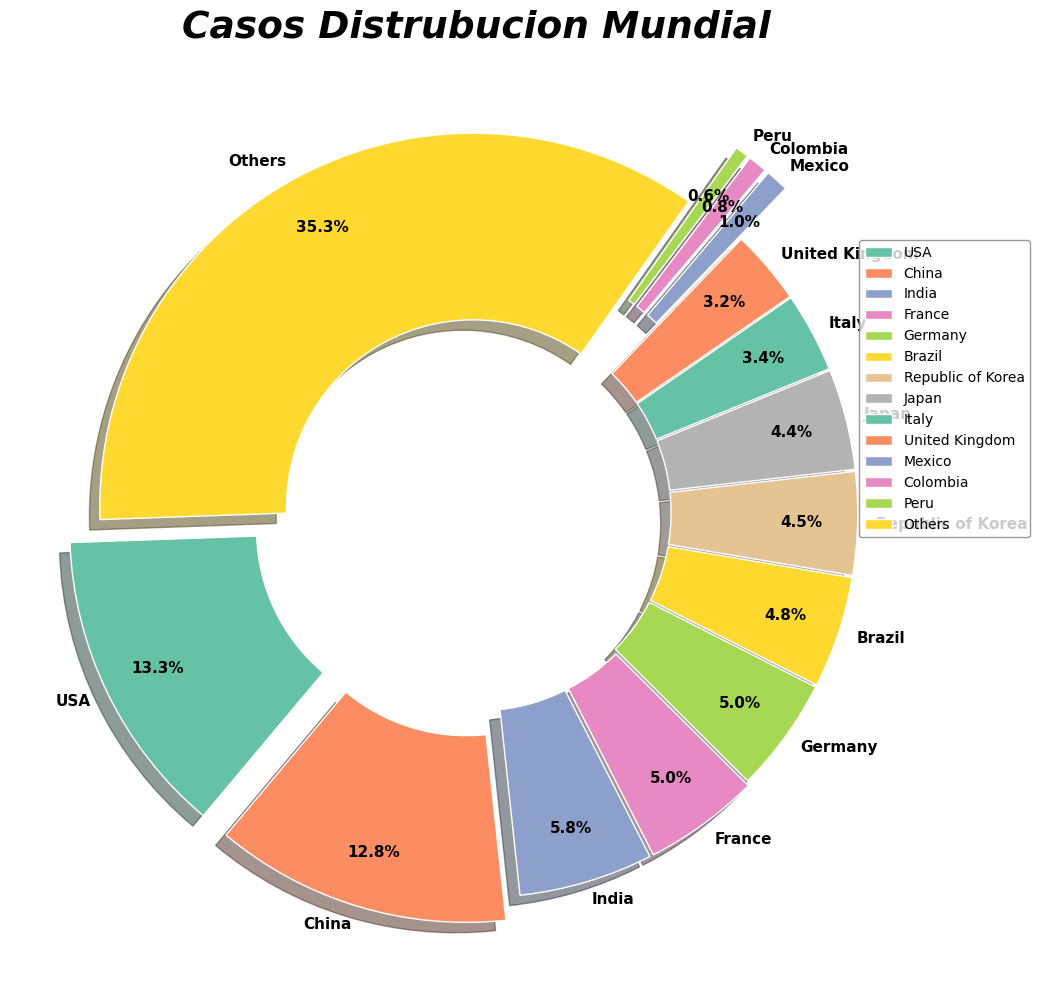

In [ ]:
## Gráfico de Pie
valores = top_10_countries['Cumulative_cases']
etiqueta = top_10_countries['Country']
explode = (0.1, 0.1, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.2, 0.2, 0.2, 0.02)
#colores = plt.cm.viridis((0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0))
data = [210, 200, 180, 170, 150, 140, 120, 100, 80, 70, 70, 60, 60, 50]
colors = plt.cm.Blues(data)
colors2 = plt.cm.viridis(data)

plt.figure(figsize=(15,10))
plt.pie(valores,labels=etiqueta, explode=explode,autopct='%1.1f%%', textprops={'fontsize': 11,'weight': 'bold'}, pctdistance=0.85,
        startangle=182, wedgeprops=dict(width=0.5, edgecolor='w'), labeldistance=1.05, colors=plt.cm.Set2.colors, shadow=True)

plt.title('Casos Distrubucion Mundial', fontdict={'fontsize': 27, 'fontweight': 'bold', 'color': 'Black',
    'family': 'sans-serif',
    'style': 'italic'})
plt.legend(etiqueta.T, bbox_to_anchor=((1.1,0.8)), frameon=True, edgecolor='gray')
plt.tight_layout()
plt.show()

* En la gráfica de pie notamos que los dos **paises con más casos acumulados** y por ende con mayor porcentaje, son **USA y China**, en ese orden respectivamente.
* El **resto de países que comprenden el Top 10**, tienen un porcentaje de casos acumulados similares que van del **5.8% al 3.2%**.
* Los 3 Países latinoamericanos analizados **(México-perú-Colombia)**, tiene porcentajes de casos acumulados mucho más bajos comparados con los demás países, va en el rango del **1% al 0.5%**.
* Considerar como dato importante la población de los países, este es un dato importante a tener en cuenta.

## 3.2 ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Colombia a lo largo del tiempo?

---



In [ ]:
## Realizamos una agrupación del dataframe por País y día reportado, seguido de la suma de los casos acumulados.
df_covid_limpio_final.groupby(['Country','Date_reported']).sum()['Cumulative_cases'].unstack()

Date_reported,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2024-04-07,2024-04-14,2024-04-21,2024-04-28,2024-05-05,2024-05-12,2024-05-19,2024-05-26,2024-06-02,2024-06-09
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,1,1,...,233682,234078,234224,234576,235214,235214,235214,235214,235214,235214
Albania,0,0,0,0,0,0,0,0,0,0,...,335031,335033,335038,335043,335047,335047,335047,335047,335047,335047
Algeria,0,0,0,0,0,0,0,0,1,19,...,272020,272021,272023,272027,272027,272027,272028,272032,272033,272034
American Samoa,0,0,0,0,0,0,0,0,0,0,...,8359,8359,8359,8359,8359,8359,8359,8359,8359,8359
Andorra,0,0,0,0,0,0,0,0,0,1,...,48015,48015,48015,48015,48015,48015,48015,48015,48015,48015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,0,0,0,0,0,0,0,0,0,0,...,3760,3760,3760,3760,3760,3760,3760,3760,3760,3760
Yemen,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
Zambia,0,0,0,0,0,0,0,0,0,0,...,349589,349616,349625,349629,349635,349640,349644,349653,349653,349661


In [ ]:
## Hacemos uso de la función pivot, a fin de crear una tabla descriptiva de como se iba acumulando los casos para todos los paises
df_grouped = df_covid_limpio_final.pivot(index='Date_reported', columns='Country', values='Cumulative_cases').reset_index()
df_grouped

Country,Date_reported,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna,Yemen,Zambia,Zimbabwe,"occupied Palestinian territory, including east Jerusalem"
0,2020-01-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,2020-02-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2024-05-12,235214,335047,272027,8359,48015,107443,3904,9106,10132325,...,1041221,175081,12019,552695,11624000,3760,11945,349640,266365,703228
228,2024-05-19,235214,335047,272028,8359,48015,107451,3904,9106,10132413,...,1041236,175081,12019,552695,11624000,3760,11945,349644,266365,703228
229,2024-05-26,235214,335047,272032,8359,48015,107454,3904,9106,10132526,...,1041242,175081,12019,552695,11624000,3760,11945,349653,266365,703228
230,2024-06-02,235214,335047,272033,8359,48015,107463,3904,9106,10132616,...,1041253,175081,12019,552695,11624000,3760,11945,349653,266365,703228


In [ ]:
## Separamos solo los paises a evaluar: México-Perú-Colombia
df_grouped_evaluate = df_grouped[['Date_reported','Mexico','Peru','Colombia']]
df_grouped_evaluate

Country,Date_reported,Mexico,Peru,Colombia
0,2020-01-05,0,0,0
1,2020-01-12,0,0,0
2,2020-01-19,0,0,0
3,2020-01-26,0,0,0
4,2020-02-02,0,0,0
...,...,...,...,...
227,2024-05-12,7709747,4524748,6385410
228,2024-05-19,7709747,4524748,6385568
229,2024-05-26,7709747,4524748,6385740
230,2024-06-02,7709747,4524748,6385947


In [ ]:
## Creamos nuevas columnas, son la diferencia de filas consecutivas de 'Cumulative_cases' a fin de conseguir los casos diarios
df_grouped_evaluate = df_grouped_evaluate.copy()
df_grouped_evaluate['Mexico_daily_cases'] = df_grouped_evaluate['Mexico'].diff().fillna(0)
df_grouped_evaluate['Peru_daily_cases'] = df_grouped_evaluate['Peru'].diff().fillna(0)
df_grouped_evaluate['Colombia_daily_cases'] = df_grouped_evaluate['Colombia'].diff().fillna(0)
df_grouped_evaluate

Country,Date_reported,Mexico,Peru,Colombia,Mexico_daily_cases,Peru_daily_cases,Colombia_daily_cases
0,2020-01-05,0,0,0,0.0,0.0,0.0
1,2020-01-12,0,0,0,0.0,0.0,0.0
2,2020-01-19,0,0,0,0.0,0.0,0.0
3,2020-01-26,0,0,0,0.0,0.0,0.0
4,2020-02-02,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
227,2024-05-12,7709747,4524748,6385410,0.0,0.0,101.0
228,2024-05-19,7709747,4524748,6385568,0.0,0.0,158.0
229,2024-05-26,7709747,4524748,6385740,0.0,0.0,172.0
230,2024-06-02,7709747,4524748,6385947,0.0,0.0,207.0


In [ ]:
## Discriminamos el dataframe solo para analizar Colombia, consideramos solo casos diarios con valores mayores a cero
daily_cases_colombia = df_grouped_evaluate[['Date_reported','Colombia_daily_cases']]
daily_cases_colombia = daily_cases_colombia[daily_cases_colombia['Colombia_daily_cases']>0]
daily_cases_colombia

Country,Date_reported,Colombia_daily_cases
9,2020-03-08,1.0
10,2020-03-15,15.0
11,2020-03-22,180.0
12,2020-03-29,527.0
13,2020-04-05,544.0
...,...,...
227,2024-05-12,101.0
228,2024-05-19,158.0
229,2024-05-26,172.0
230,2024-06-02,207.0


In [ ]:
## Discriminamos el dataframe solo para analizar Perú, consideramos solo casos diarios con valores mayores a cero
daily_cases_peru = df_grouped_evaluate[['Date_reported','Peru_daily_cases']]
daily_cases_peru = daily_cases_peru[daily_cases_peru['Peru_daily_cases']>0]
daily_cases_peru

Country,Date_reported,Peru_daily_cases
9,2020-03-08,9.0
10,2020-03-15,38.0
11,2020-03-22,271.0
12,2020-03-29,317.0
13,2020-04-05,960.0
...,...,...
213,2024-02-04,637.0
214,2024-02-11,426.0
215,2024-02-18,340.0
216,2024-02-25,250.0


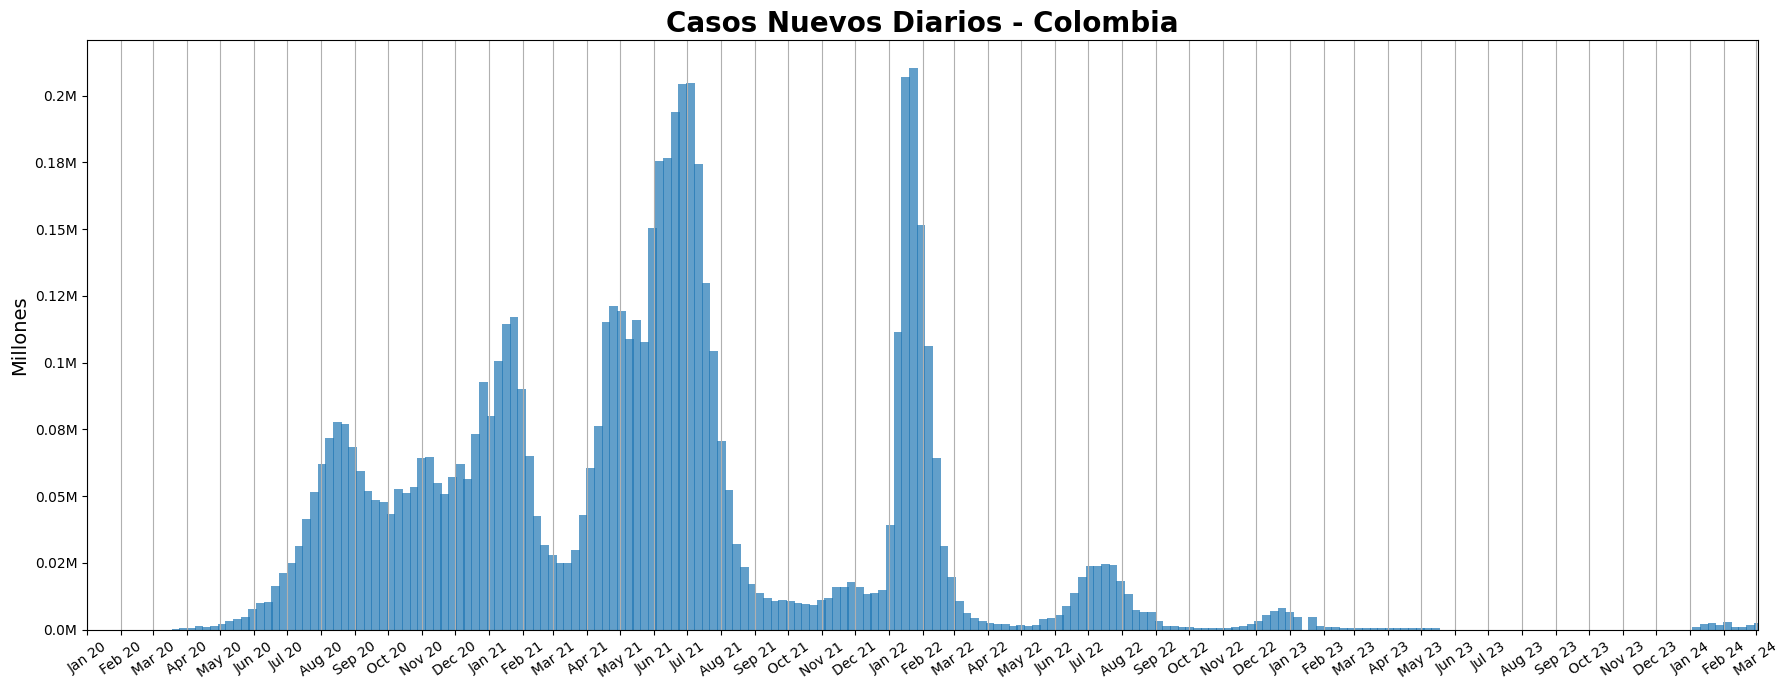

In [ ]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
plt.figure(figsize=(18,7))
plt.bar(daily_cases_colombia['Date_reported'],daily_cases_colombia['Colombia_daily_cases'],alpha=0.7, width=8)
plt.title('Casos Nuevos Diarios - Colombia', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Millones', fontdict={'fontsize': 14, 'color': 'black'})

# Ajustar el límite inferior del eje x a enero de 2020
start_date = pd.to_datetime('2020-01-01')
end_date = daily_cases_peru['Date_reported'].max()

# Añadir formateo al eje Y con números enteros y "M" para millones
def millions_formatter(x, _):
    return f'{round(x/1e6, 2)}M'

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %y")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.xlim(start_date, end_date) # Establecer los límites del eje x
plt.grid(axis='x')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

## 3.3 ¿Cuál es la evolución del índice de letalidad del Covid-19 en Colombia, comparado con los países con los índices históricos más elevados?

---



In [ ]:
## Verificamos nuestro dataframe en el cual realizaremos el análisis
df_covid_limpio_final

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date_str,New_deaths_log
0,2020-01-05,AF,Afghanistan,0,0,0,0,2020-01-05,0.0
1,2020-01-12,AF,Afghanistan,0,0,0,0,2020-01-12,0.0
2,2020-01-19,AF,Afghanistan,0,0,0,0,2020-01-19,0.0
3,2020-01-26,AF,Afghanistan,0,0,0,0,2020-01-26,0.0
4,2020-02-02,AF,Afghanistan,0,0,0,0,2020-02-02,0.0
...,...,...,...,...,...,...,...,...,...
55443,2024-05-12,ZW,Zimbabwe,0,266365,0,5740,2024-05-12,0.0
55444,2024-05-19,ZW,Zimbabwe,0,266365,0,5740,2024-05-19,0.0
55445,2024-05-26,ZW,Zimbabwe,0,266365,0,5740,2024-05-26,0.0
55446,2024-06-02,ZW,Zimbabwe,0,266365,0,5740,2024-06-02,0.0


In [ ]:
## Agrupamos los 5 paises con mayor lethality_rate promedio hasta estos momentos
top_5_lethality_rate=df_covid_limpio_final['lethality_rate'] = df_covid_limpio_final['Cumulative_deaths'] / df_covid_limpio_final['Cumulative_cases']
top_5_lethality_rate.head(20)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.021978
13    0.018248
14    0.028791
15    0.033040
16    0.032331
17    0.029480
18    0.029470
19    0.025277
dtype: float64

In [ ]:
# Filtrar datos para México, Perú y Colombia
countries_of_interest = ['Mexico', 'Peru', 'Colombia']
df_covid_filtered = df_covid_limpio_final[df_covid_limpio_final['Country'].isin(countries_of_interest)]

# Verificar los datos filtrados
df_covid_filtered.head()


,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date_str,New_deaths_log,lethality_rate
10440,2020-01-05,CO,Colombia,0,0,0,0,2020-01-05,0.0,NaN
10441,2020-01-12,CO,Colombia,0,0,0,0,2020-01-12,0.0,NaN
10442,2020-01-19,CO,Colombia,0,0,0,0,2020-01-19,0.0,NaN
10443,2020-01-26,CO,Colombia,0,0,0,0,2020-01-26,0.0,NaN
10444,2020-02-02,CO,Colombia,0,0,0,0,2020-02-02,0.0,NaN


In [ ]:
# Calcular el promedio del índice de letalidad por país
lethality_rate_by_country = df_covid_limpio_final.groupby('Country')['lethality_rate'].mean()

# Obtener los 3 países con el índice de letalidad más alto
top_lethality_countries = lethality_rate_by_country.sort_values(ascending=False).head(3).index

# Verificar los países con índices de letalidad más elevados
print(top_lethality_countries)


Index(['France', 'Mauritania', 'Yemen'], dtype='object', name='Country')


In [ ]:
# Filtrar los datos para los países con índices de letalidad más elevados
df_top_lethality_countries = df_covid_limpio_final[df_covid_limpio_final['Country'].isin(top_lethality_countries)]

# Combinar con los datos de México, Perú y Colombia
df_combined = pd.concat([df_covid_filtered, df_top_lethality_countries])

# Verificar los datos combinados
print(df_combined.head())


      Date_reported Country_code   Country  New_cases  Cumulative_cases  \
10440    2020-01-05           CO  Colombia          0                 0   
10441    2020-01-12           CO  Colombia          0                 0   
10442    2020-01-19           CO  Colombia          0                 0   
10443    2020-01-26           CO  Colombia          0                 0   
10444    2020-02-02           CO  Colombia          0                 0   

       New_deaths  Cumulative_deaths    Date_str  New_deaths_log  \
10440           0                  0  2020-01-05             0.0   
10441           0                  0  2020-01-12             0.0   
10442           0                  0  2020-01-19             0.0   
10443           0                  0  2020-01-26             0.0   
10444           0                  0  2020-02-02             0.0   

       lethality_rate  
10440             NaN  
10441             NaN  
10442             NaN  
10443             NaN  
10444             Na

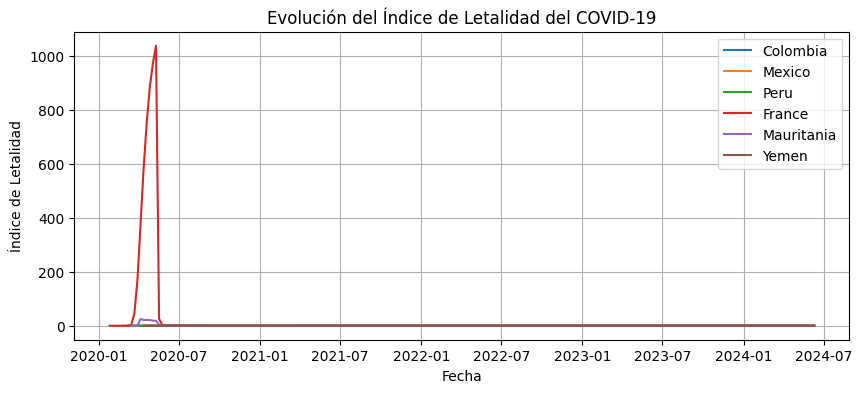

In [ ]:
# Graficar la evolución del índice de letalidad
plt.figure(figsize=(10, 4))

for country in df_combined['Country'].unique():
    df_country = df_combined[df_combined['Country'] == country]
    plt.plot(df_country['Date_reported'], df_country['lethality_rate'], label=country)

plt.xlabel('Fecha')
plt.ylabel('Índice de Letalidad')
plt.title('Evolución del Índice de Letalidad del COVID-19')
plt.legend()
plt.grid(True)
plt.show()


# 4. CONCLUSIONES FINALES

---



* Los países más afectados por el Covid19, fueron **USA y CHINA**, consiguiendo casos registrados de **covid 19** y decesos records comparados con los demás países. Tener en cuenta que un **factor importante** es la **densidad de población del país**, esto generó que estos países concentraran toda esta magnitud.


* **México**, tuvo un **periodo complicado** de la pandemia durante el **primer año y medio**. Fue afectada por varias variantes, pero una de las que generó picos de nuevos casos y decesos fue la variante **Delta**. Si bien los fallecidos también tuvieron picos en estos periodos, no fueron comparables a los picos conseguidos al inicio de la pandemia, quizás ocasionado por la no correcta adopción de medidas sanitarias y concientización de la población.


* **Perú**, tuvo un **periodo complicado** de la pandemia durante el **primer año y medio**, teniendo crisis sanitaria y hospitalaria fuerte. El proceso de vacunación fue tardado, esto alimento a que los decesos fueran no controlables en este periodo inicial. Después de este periodo complicado, perú puede controlar adecuadamente el **Covid19**, consiguiendo que gran parte de la población logre vacunarse y asi los decesos disminuyeron considerablemente hasta el final de la pandemia. La primeras variantes del covid19 afectaron mucho a perú, sin embargo, cuando llegó la variante **Omicrón**, se pudo controlar el número de decesos por más que los nuevos casos siguieron aumentando por intervalos de tiempo.


* **Colombia**, tuvo un **periodo complicado** de la pandemia durante el **primer año y medio**. Los nuevos casos como los decesos aumentaban a rates parecidos, esto generó descontrol en el país, con **crisis sanitaria y hospitalaria fuerte**. Despues de este periodo gris, colombia **pudo controlar medianamente el covid19**, debido a su aumento en la **vacunacion de la población**; Sin embargo algunas nuevas variantes como el **Omicrón**, generaron intervalos de preocupación y crisis.


* Cada país se vió afectado de distinta manera por las diferentes variantes del **Covid19**, no todas afectaron en misma magnitud a todos los países.


* Luego de analizar la data para los múltiples países, se puede concluir que el **proceso de vacunación**, cuando se empezó a adoptar si **tuvo resultados favorables** en los meses posteriores. Esto se puede visualizar en los **gráficos de nuevos casos como de decesos**